In [3]:
import sympy
from sympy import S, Symbol, symbols, simplify, nonlinsolve, Matrix, diff, factor, solve

## Занятие 15
## Математический анализ
## Экстремум функции нескольких переменных
### Задание 1
Найти точки экстремума:

1) $z = x^2 + xy + y^2 - 2x - y$

2) $z = x^3y^2(6 - x - y)$, $(x, y > 0)$

3) $z = \frac{8}{x} + \frac{x}{y} + y$

4) $z = \frac{1 + x - y}{\sqrt{1 + x^2 + y^2}}$
###### Указание.
Вначале найти стационарные точки. Составить определитель из вторых производных в произвольной точке. Подставляя найденные (вещественные) стационарные точки, решить вопрос о наличии экстремума.

In [4]:
from sympy.abc import x, y

#1
f = x**2 + x*y + y**2 - 2*x - y
stat_points = nonlinsolve([f.diff(x), f.diff(y)], [x, y])

Delta = Matrix([[f.diff(x, 2), f.diff(x, y)], [f.diff(x, y), f.diff(y, 2)]]).det()
x0, y0 = tuple(*stat_points)

display(stat_points)
display(Delta.subs({x: x0, y: y0}))
print()

#2
x1, y1 = symbols('x y', positive=True)
u = x1**3*y1**2*(6 - x1 - y1)

stat_points = nonlinsolve([u.diff(x1), u.diff(y1)], [x1, y1])
display(*stat_points)

def Delta(u, x1, y1):
    return Matrix([[u.diff(x1, 2), u.diff(x1, y1)],
                [u.diff(y1, x1), u.diff(y1, 2)]]).det()

for point in stat_points:
        x0, y0 = point
        if x0.is_real and y0.is_real:
            if Delta(u, x1, y1).subs({x1: x0, y1: y0}) > 0:
                A = u.diff(x1, 2).subs({x1: x0, y1: y0})
                B = u.diff(y1, 2).subs({x1: x0, y1: y0})
                if A > 0 or B > 0:
                    display('minimum', point)
                elif A < 0 or B < 0:
                     display('maximum', point)
print()

#3
x3, y3 = symbols('x y', positive=True)
u1 = 8/x3 + x3/y3 + y3

stat_points = nonlinsolve([u1.diff(x3), u1.diff(y3)], [x3, y3])
display(*stat_points)

def Delta(u1, x3, y3):
    return Matrix([[u1.diff(x3, 2), u1.diff(x3, y3)],
                   [u1.diff(y3, x3), u1.diff(y3, 2)]]).det()

for point in stat_points:
        x0, y0 = point
        if x0.is_real and y0.is_real:
              A1 = u1.diff(x3, 2).subs({x3: x0, y3: y0})
              B1 = u1.diff(y3, 2).subs({x3: x0, y3: y0})
              display(A1, B1)
print()

#4
x2, y2 = symbols('x y', positive=True)
u =(1 + x2 - y2)/((1 + x2**2 + y2**2)**0.5)

stat_points = solve([u.diff(x2), u.diff(y2)], [x2, y2])
display(stat_points)

def Delta(u, x2, y2):
    return Matrix([[u.diff(x2, 2), u.diff(x2, y2)],
                   [u.diff(y2, x2), u.diff(y2, 2)]]).det()

for point in stat_points:
        x0, y0 = point
        if x0.is_real and y0.is_real:
            if Delta(u, x2, y2).subs({x2: x0, y2: y0}) > 0:
                A = u.diff(x2, 2).subs({x2: x0, y2: y0})
                B = u.diff(y2, 2).subs({x2: x0, y2: y0})
                if A > 0 or B > 0:
                    display('minimum', point)
                elif A < 0 or B < 0:
                     display('maximum', point)
print()

{(1, 0)}

3

(0, y)

(x, 0)

(0, 0)

(4, 2)

(-2 - 2*sqrt(3)*I, -1 + sqrt(3)*I)

(-2 + 2*sqrt(3)*I, -1 - sqrt(3)*I)

zoo

0

1/4

1

[]

### Задание 2.
С помощью метода Лагранжа найти условный экстремум функции
$z = x + 2y$ при условии $x^2 + y^2 = 5$.

In [7]:
x, y, lam = symbols('x y lamda')

varrs = [x, y, lam]
f = x + 2 * y
restriction = x**2 + y**2 - 5
L = f + lam * restriction
stat_points = nonlinsolve([L.diff(var)for var in varrs], varrs)

dx, dy, dx2, dy2 = symbols('dx dy dx^2 dy^2')
d2L = L.diff(x,2) * dx2 + 2 * L.diff(x,y) * dx * dy + L.diff(y,2) * dy2
factor(d2L)

ff = Symbol('f')
for point in stat_points:
    display(point[:-1], sympy.Eq(ff, f.subs({var: point[j] for j, var in enumerate(varrs)})))

(-1, -2)

Eq(f, -5)

(1, 2)

Eq(f, 5)

### Задание 3.
С помощью метода Лагранжа найти условный экстремум функции
$z=x^2+y^2$ при условии $\frac{x}{2}+\frac{y}{3}=1$.

In [8]:
varrs = [x, y, lam]
f = x**2 + y**2
restriction = x/2 + y/3 - 1
L = f + lam * restriction
stat_points = nonlinsolve([L.diff(var)for var in varrs], varrs)

dx, dy, dx2, dy2 = symbols('dx dy dx^2 dy^2')
d2L = L.diff(x,2) * dx2 + 2 * L.diff(x,y) * dx * dy + L.diff(y,2) * dy2
factor(d2L)

for point in stat_points:
    display(point[:-1], sympy.Eq(ff, f.subs({var: point[j] for j, var in enumerate(varrs)})))

(18/13, 12/13)

Eq(f, 36/13)

### Задание 4.
С помощью метода Лагранжа найти экстремум функции $u = x - 2y + 2z$ при условии $x^2 + y^2 + z^2 = 9$.

In [9]:
z = symbols('z')

varrs = [x, y, z, lam]
u = x - 2 * y + 2 * z
restriction = x**2 + y**2 + z**2 - 9
L = u + lam * restriction
stat_points = nonlinsolve([L.diff(var)for var in varrs], varrs)

dx, dy, dz, dx2, dy2, dz2 = symbols('dx dy dz dx^2 dy^2 dz^2')
d2L = 0

diffs = {x: (dx, dx2), y: (dy, dy2), z: (dz, dz2)}
for i, var in enumerate(varrs[:-1]):
    d2L += L.diff(var, 2) * diffs[var][1]
    for j in range(i + 1, 3):
        d2L += 2*L.diff(var, varrs[j]) * diffs[var][0]*diffs[varrs[j]][0]

display(d2L)
L2_points = [d2L.subs(lam, lval) for lval in (-1/2, 1/2)]
display(*L2_points)

uu = Symbol('u')
for point in stat_points:
        display(point[:-1])

2*dx^2*lamda + 2*dy^2*lamda + 2*dz^2*lamda

-1.0*dx^2 - 1.0*dy^2 - 1.0*dz^2

1.0*dx^2 + 1.0*dy^2 + 1.0*dz^2

(-1, 2, -2)

(1, -2, 2)

### Индивидуальное задание
Найти точки экстремума $u = x^2 + y^2 + z^2 - xy + x - 2z$.

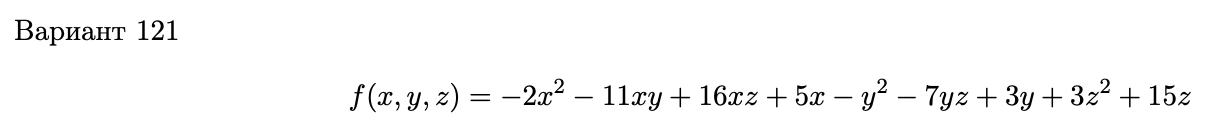

In [10]:
x, y, z = symbols('x y z', positive=True)

u = -2 * x**2 - 11 * x * y + 16 * x * z + 5 * x - y**2 - 7 * y * z + 3 * y + 3*z**2 + 15 * z

stat_points = nonlinsolve([u.diff(x), u.diff(y), u.diff(z)], [x, y, z])

def Delta(u, x, y, z):
    return Matrix([[u.diff(x, 2), u.diff(x, y), u.diff(x, z)],
                   [u.diff(y, x), u.diff(y, 2), u.diff(y, z)],
                   [u.diff(z, x), u.diff(z, y), u.diff(z,2)],]).det()

for point in stat_points:
        x0, y0, z0 = point
        if x0.is_real and y0.is_real and z0.is_real:
            if Delta(u, x, y, z).subs({x: x0, y: y0, z: z0}) > 0:
                A = u.diff(x, 2).subs({x: x0, y: y0, z: z0})
                B = u.diff(y, 2).subs({x: x0, y: y0, z: z0})
                C = u.diff(z, 2).subs({x: x0, y: y0, z: z0})

                if A > 0 or B > 0 or C > 0:
                    display('minimum', point)
                elif A < 0 or B < 0 or C < 0:
                    display('maximum', point)

'minimum'

(-596/1247, 2065/1247, 881/1247)